# Support Vector Machines

### Verschiedene Methoden um Daten zu simulieren
Eine Sammlung von verschieden Methoden um Daten zu simulieren:  
* Methode um Daten mit zwei Klassen zu simulieren, welche linear trennbar sind (`seperable=True/False` gibt an ob die Daten perfekt trennbar sind oder teilweise überlappen):  
`generate_linear_data(n_samples=1000,seperable=True,scaled=True)`   
  
* Methode um Daten mit zwei Klassen zu simulieren, welche nicht linear trennbar sind:  
`generate_non_linear_data(n_samples=1000)`    
  
* Transformiert Daten von $\mathbb{R}^2$ in $\mathbb{R}^3$:  
`transform_data_2_3d(X,y)`    

In [1]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import pylab as pl
import matplotlib
matplotlib.rcParams.update({'font.size': 22})

from plotly.offline import init_notebook_mode, iplot
from plotly.graph_objs import *
import plotly.tools as tls
init_notebook_mode(connected=True)

import scipy as sp
from sklearn.datasets import make_circles, make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

'''
Generate  Linear Seperable Data for SVM Demo
'''
def generate_linear_data(n_samples=800,seperable=True,scaled=True):
    if seperable:
        X1, Y1 = make_blobs(n_samples=n_samples,n_features=2,centers=2,shuffle=True,
                            center_box=[-4,4],random_state=42)
    else:
        X1, Y1 = make_blobs(n_samples=n_samples,n_features=2,centers=2,shuffle=True,
                            center_box=[-3,3],random_state=42)
    
    if scaled:
        scaler = StandardScaler()
        X1 = scaler.fit_transform(X1)
        
    return X1, Y1

'''
Generate Non Linear Seperable Data for SVM Demo
'''
def generate_non_linear_data(n_samples=800):
    X1, Y1 = make_circles(n_samples=n_samples, noise=0.05, factor=0.4,random_state=42)
    return X1, Y1

'''
Map 2D data into 3D Feature Space
'''
def transform_data_2_3d(X,y):
    #transform data using the following transformation: [x1, x2, x1**2.0 + x2**2.0]
    poly_kernel = lambda x1,x2: sp.array([x1,x2,x1**2.0+x2**2.0])
    newX = sp.array([poly_kernel(x1,x2) for x1,x2 in zip(sp.ravel(X[:,0]),sp.ravel(X[:,1]))])
    return newX, y

### Methode um Daten zu visulisieren
Diese Methode plotted die simulierten Daten, entweder statisch oder interactive (`interactive=True/False`). Falls, ein SVM Model mit übergeben wird, wird zusätzlich die Entscheidungsfunktion und die Margin geplotten. Falls, die Daten in $\mathbb{R}^3$ sind werden diese in 3D geplotten.

In [2]:
def plot_data(X,y,svm=None,interactive=True):
    if X.shape[1]==2:
        fig = pl.figure(figsize=(11,6))
        if svm:
            w = svm.coef_[0]
            b = svm.intercept_[0]

            x0 = sp.linspace(-1,1,50)
            decision_boundary = -w[0]/float(w[1]) * x0 - b/float(w[1])

            margin = 1/float(w[1])
            margin_up = decision_boundary + margin
            margin_down = decision_boundary - margin

            svs = svm.support_vectors_
            pl.plot(svs[:, 0], svs[:, 1],"o",markersize=17, markeredgecolor="#8e44ad",markeredgewidth=2,markerfacecolor="#ffffff",alpha=0.5)
            pl.plot(x0, decision_boundary, "k-", linewidth=2,label="Entscheidungsfunktion")
            pl.plot(x0, margin_up, "k--", color="#16a085", linewidth=2,label="Margin")
            pl.plot(x0, margin_down, "k--", color="#16a085", linewidth=2)
            
        pl.plot(X[y==0,0],X[y==0,1],"o",color="#e67e22",label="Negative Class",markersize=10)
        pl.plot(X[y==1,0],X[y==1,1],"s",color="#2980b9",label="Positive Class",markersize=10)
        pl.xlabel("x1")
        pl.ylabel("x2")
        
        if interactive:
            plotly_fig = tls.mpl_to_plotly(fig)
            iplot(plotly_fig, show_link=False)
        else:
            ax = pl.gca()
            ax.spines['top'].set_visible(False)
            ax.spines['right'].set_visible(False)
            ax.spines['left'].set_visible(True)
            ax.spines['bottom'].set_visible(True)

            #turn off all ticks
            ax.yaxis.set_ticks_position('none')
            ax.xaxis.set_ticks_position('none')
            pl.legend(ncol=4,loc="upper right",frameon=False)
            pl.ylim([-2,3])
            pl.show()
            
    else: #3D plots
        if interactive:
            negClass = Scatter3d(x = newX[y==0,0], y = newX[y==0,1], z = newX[y==0,2],
                                 mode = 'markers',name="Negative Class",
                                 marker=dict(opacity=0.5,size=3))
            posClass = Scatter3d(x = newX[y==1,0], y = newX[y==1,1], z = newX[y==1,2],
                                 mode = 'markers',name="Positive Class",
                                 marker=dict(opacity=0.5,size=3))
            if svm!=None:            
                tmp = sp.linspace(-1,1,51)
                x0,y0 = sp.meshgrid(tmp,tmp)

                decision_boundary = lambda x,y: (-svm.intercept_[0]-svm.coef_[0][0]*x-svm.coef_[0][1]) / svm.coef_[0][2]

                db_pl = Surface(x=x0,y=y0,z=decision_boundary(x0,y0),
                                opacity=0.8,
                                autocolorscale=False,
                                surfacecolor="#8e44ad",
                                showscale=False,
                                cauto=False,
                                showlegend=False,)

                plotData = [posClass,negClass,db_pl]
                
            else:
                plotData = [posClass,negClass]
            
            layout = dict(title=None,
                          font=dict(family='Optima', size=15, color='#7f7f7f'),
                          margin=Margin(l=0,r=0,b=0,t=50,),
                         )

            fig = dict(data=plotData,layout=layout)
            iplot(fig,show_link=False,filename="linear_data",image_height=2000,image_width=4000)
        else:
            fig = pl.figure(figsize=(11,6))
            ax = fig.add_subplot(111, projection='3d')

            ax.scatter(X[y==1,0],X[y==1,1],X[y==1,2], c='#2980b9', marker='s')
            ax.scatter(X[y==0,0],X[y==0,1],X[y==0,2], c='#e67e22', marker='o')

            if svm!=None:            
                tmp = sp.linspace(-1,1,51)
                x0,y0 = sp.meshgrid(tmp,tmp)

                decision_boundary = lambda x,y: (-svm.intercept_[0]-svm.coef_[0][0]*x-svm.coef_[0][1]) / svm.coef_[0][2]

                ax.plot_surface(x0,y0,decision_boundary(x0,y0), color='#8e44ad',alpha=0.6,shade=False)

            pl.show()

# Beispiel 1
In dem ersten Beispiel simulieren wir linear trennbare Daten, plotten diese und wenden eine Lineare SVM auf die Daten an. In diesem Beispiel betrachten wir die Hard Margin SVM, hierzu wird der Parameter C auf einen hohen Wert.

### Simuliere Daten

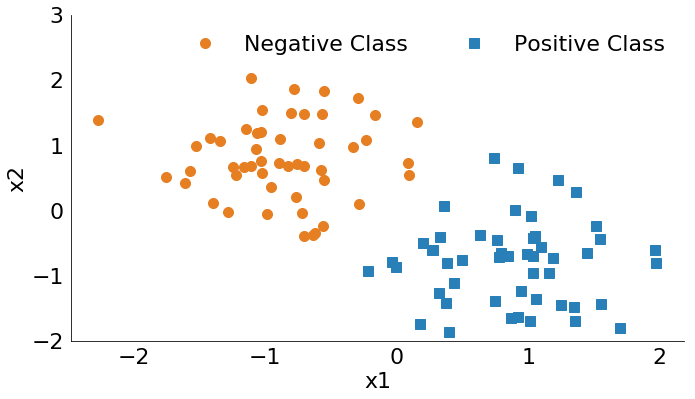

In [3]:
X,y = generate_linear_data(n_samples=100,seperable=True)
plot_data(X,y,interactive=False)   

### Wende Hard-Margin SVM auf Daten an
Beachte, ein hoher C-Wert führt zur Hard-Margin SVM!

In [4]:
svm = SVC(kernel="linear",C=10**6)
svm.fit(X,y)
plot_data(X,y,svm,interactive=True)

# Beispiel 2
In dem zweiten Beispiel simulieren wir wieder Daten, welche man mit einer Soft-Margin SVM klassifizeren kann.

### Simuliere nicht perfekt linear trennbare Daten

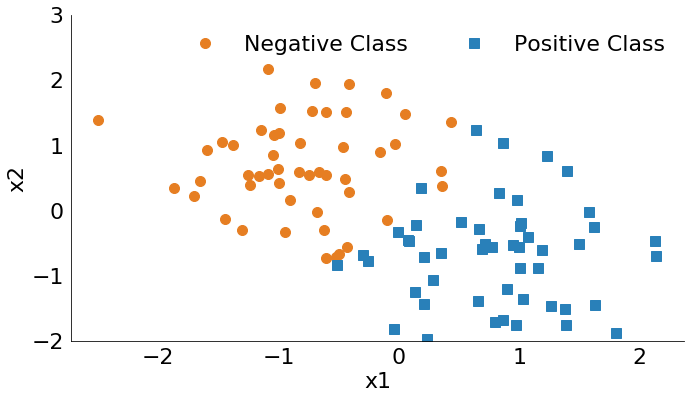

In [5]:
X,y = generate_linear_data(n_samples=100,seperable=False)
plot_data(X,y,interactive=False)   

### Wende Soft-Margin SVM (C-SVM) mit kleinem C auf Daten an

In [6]:
svm = SVC(kernel="linear",C=10**-1)
svm.fit(X,y)
plot_data(X,y,svm,interactive=True)

### Wende Soft-Margin SVM (C-SVM) mit großem C auf Daten an

In [7]:
svm = SVC(kernel="linear",C=100)
svm.fit(X,y)
plot_data(X,y,svm,interactive=True)

# Beispiel 3

Im dritten Beispiel simulieren wir zwei Klassen, welche nicht mit einer linearen Funktion trennbar sind, z.B. zwei inneinanderliegende Kreise.

### Simuliere nicht linear trennbare Daten

In [8]:
X,y = generate_non_linear_data(n_samples=1000)
plot_data(X,y,interactive=True)

### Transformiere Daten von $\mathbb{R}^2$ in $\mathbb{R}^3$

In [9]:
newX, y = transform_data_2_3d(X,y)
plot_data(newX,y,interactive=True)

### Wende SVM mit linearen Kernel auf transformierte Daten an

In [10]:
svm = SVC(kernel="linear",C=0.1)
svm.fit(newX,y)
plot_data(newX,y,svm,interactive=True)

# Beispiel 4
In unserem viertem Beispiel wenden wir einen Polynomiellen Kernel auf unsere nicht transformierten (orginal) Daten an.

### Verwende SVM mit Polynomiellen Kernel auf nicht linear trennbaren Daten an

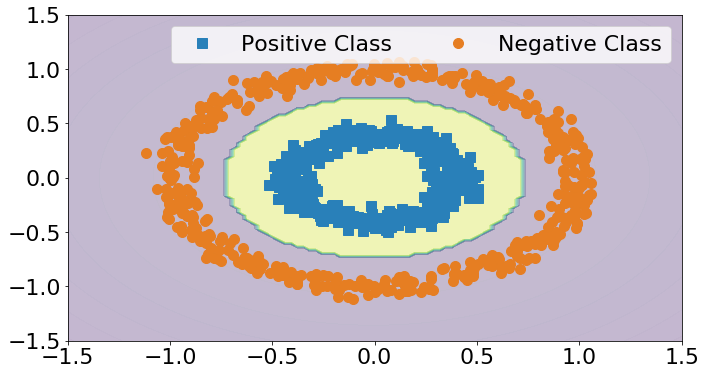

In [11]:
#Plotte Decision Boundery
def plot_predictions(X_,y_,svm, axes):
    x0s = sp.linspace(axes[0], axes[1], 100)
    x1s = sp.linspace(axes[2], axes[3], 100)
    x0, x1 = sp.meshgrid(x0s, x1s)
    X = sp.c_[x0.ravel(), x1.ravel()]
    y_pred = svm.predict(X).reshape(x0.shape)
    y_decision = svm.decision_function(X).reshape(x0.shape)
    fig = pl.figure(figsize=(11,6))
    pl.contourf(x0, x1, y_pred,  alpha=0.3)
    pl.contourf(x0, x1, y_decision, alpha=0.02,label="Decision Boundary")
    pl.plot(X_[y_==1,0],X_[y_==1,1],"s",color="#2980b9",label="Positive Class",markersize=10)
    pl.plot(X_[y_==0,0],X_[y_==0,1],"o",color="#e67e22",label="Negative Class",markersize=10)
    pl.legend(ncol=2)
    
#Wende Polynomiellen Kernel des zweiten Grades auf nicht linear trennbaren Daten an
svm = SVC(kernel="poly",C=1,degree=2)
svm.fit(X,y)
plot_predictions(X,y,svm,[-1.5, 1.5, -1.5, 1.5])